# Run PAML example as is

The files that we are going to use for this example are:
* data/lysozyme/lysozymeSmall.txt
* data/lysozyme/lysozymeSmall.trees
* data/lysozyme/lysozymeSmall.ctl

## Requirements

- ete3
- ete3_external_tools

ete_evol tools allows to run directly CodeML using PAML configuration file.

In [22]:
%%bash
cat data/lysozyme/lysozymeSmall.ctl

      seqfile = lysozymeSmall.txt
     treefile = lysozymeSmall.trees
      outfile = mlc

        noisy = 9   * 0,1,2,3,9: how much rubbish on the screen
      verbose = 1   * 1: detailed output, 0: concise output
      runmode = 0   * 0: user tree;  1: semi-automatic;  2: automatic
                    * 3: StepwiseAddition; (4,5):PerturbationNNI 

      seqtype = 1   * 1:codons; 2:AAs; 3:codons-->AAs
    CodonFreq = 2   * 0:1/61 each, 1:F1X4, 2:F3X4, 3:codon table
        clock = 0   * 0: no clock, unrooted tree, 1: clock, rooted tree
        model = 2
                    * models for codons:
                        * 0:one, 1:b, 2:2 or more dN/dS ratios for branches

      NSsites = 0   * dN/dS among sites. 0:no variation, 1:neutral, 2:positive
        icode = 0   * 0:standard genetic code; 1:mammalian mt; 2-10:see below

    fix_kappa = 0   * 1: kappa fixed, 0: kappa to be estimated
        kappa = 2   * initial or fixed kappa
    fix_omega = 0   * 1: omega or omega_1 fixed, 0: est

The configuration file above corresponds to a branch model where marked branches are allowed to evolve at different $\omega$ rate than non-marked branches. In this example from PAML, the branch marked is the branch *c* (the ancestor of Angolan colobus and Douc langur). See the tree in the PAML example:

In [23]:
%%bash
head data/lysozyme/lysozymeSmall.trees

    1


((Hsa_Human, Hla_gibbon),((Cgu/Can_colobus, Pne_langur) '#1', Mmu_rhesus), (Ssc_squirrelM, Cja_marmoset)); / * table 1B&F */


// end of file





Running codeml from the ete_evol tool using this configuration file would be:

In [4]:
%%bash
ete3 evol --codeml_config_file data/lysozyme/lysozymeSmall.ctl

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model XX.lysozymeSmall.ctl
       marking branches 11

          ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

SUMMARY BY MODEL

 - Model XX.lysozymeSmall.ctl.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.506
      background  =>   0.686


This command will run codeml on the control file with the only difference that the output file will be replaced by an output folder where all PAML ouput files will be stored.

In [5]:
%%bash
ls data/lysozyme/mlc/XX.lysozymeSmall.ctl/

ls: cannot access data/lysozyme/mlc/XX.lysozymeSmall.ctl/: No such file or directory


Notice that an extra folder called `XX.lysozymeSmall.ctl` is created in order to allow one extra layer of organization if several control files have the same "outfile".

At the end of the main codeML output file we can see the result of the optimized branch model with a foreground $\omega$ of 3.5 and a background $\omega$ of 0.7

In [6]:
%%bash
tail -n 5 data/lysozyme/mlc/XX.lysozymeSmall.ctl/out

tail: cannot open ‘data/lysozyme/mlc/XX.lysozymeSmall.ctl/out’ for reading: No such file or directory


On top of this, the ete_evol tool will generate a summary image:

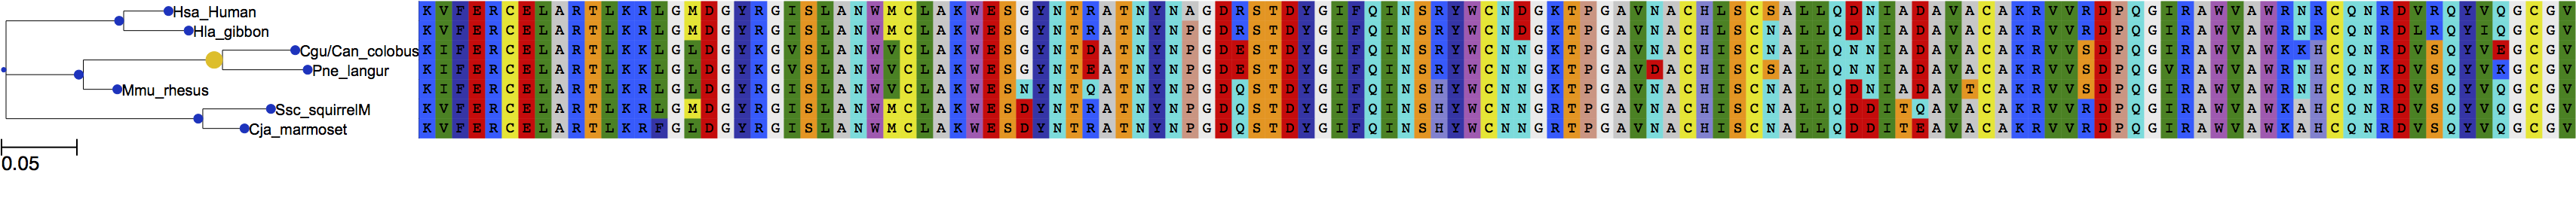

In [7]:
from IPython.display import Image
Image(filename='data/lysozyme/tree_evol_example1.png')

Image which can be called interactively using the `--view` flag:

In [8]:
%%bash
ete3 evol --codeml_config_file data/lysozyme/lysozymeSmall.ctl --view --resume

Using: /Users/jhc/anaconda/bin/ete3_apps/bin/Slr
Using: /Users/jhc/anaconda/bin/ete3_apps/bin/codeml

Running CodeML/Slr (1 CPUs)
  - processing model XX.lysozymeSmall.ctl
       marking branches 11

Model XX.lysozymeSmall.ctl.11-1 already executed... SKIPPING
SUMMARY BY MODEL

 - Model XX.lysozymeSmall.ctl.11-1
   * Marked branches
      ((Hsa_Human,Hla_gibbon),((Cgu/Can_colobus,Pne_langur) #1,Mmu_rhesus),(Ssc_squirrelM,Cja_marmoset));

        Branches  =>   omega
              #1  =>   3.506
      background  =>   0.686


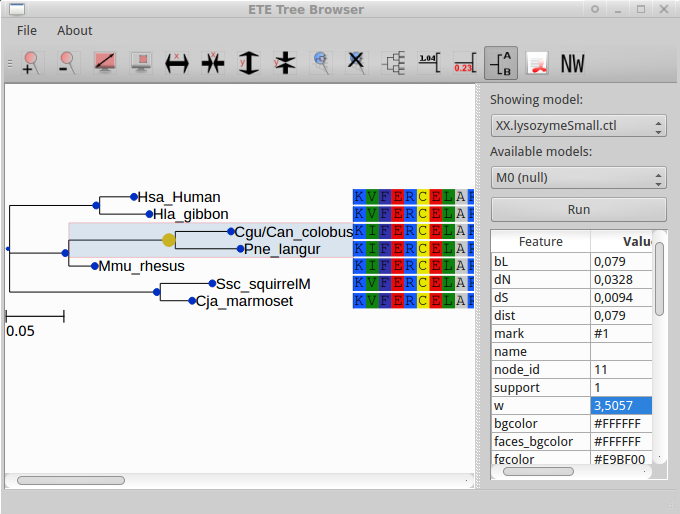

In [9]:
from IPython.display import Image
Image(filename='data/lysozyme/ete_run1_lysozyme.png')